# Neighborhood graphs

Visualizations to put into presentation. 

Three main types:
- Maps with binned values for important features (sales price and square footage)
- graphs to look at neighborhoods (barplots and map)
- graphs to look at neighborhoods with Alex's clustered values colored

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper 

# Makes figures a higher resolution. Better for saving.
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))

In [3]:
# importing data
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory = False)

# data processing
train, test = helper.data_processing_wrapper(housing,
                                               num_to_cat_list = ['MSSubClass','MoSold'],
                                             remove_PID = False
                                        )

housing_no_geo = pd.concat([train,test],axis=0)

In [4]:
# importing latlong data
latlong = pd.read_csv('ames_housing_latlong.csv', index_col=0)
latlong_keep = [
    'PID',
    'latitude',
    'longitude'
]
latlong = latlong[latlong_keep]

# merge school feature onto original data set.
housing = housing_no_geo.merge(latlong, how = 'left', left_on = 'PID', right_on = 'PID')
housing = housing.dropna(subset=['latitude'])

housing = pd.read_csv('ames_housing_latlong.csv', index_col=0)
loca = housing[(housing['latitude']>=41.9)&(housing['longitude']<=-93.59)]

## binned maps

<ipython-input-5-dfc6a255c84f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc

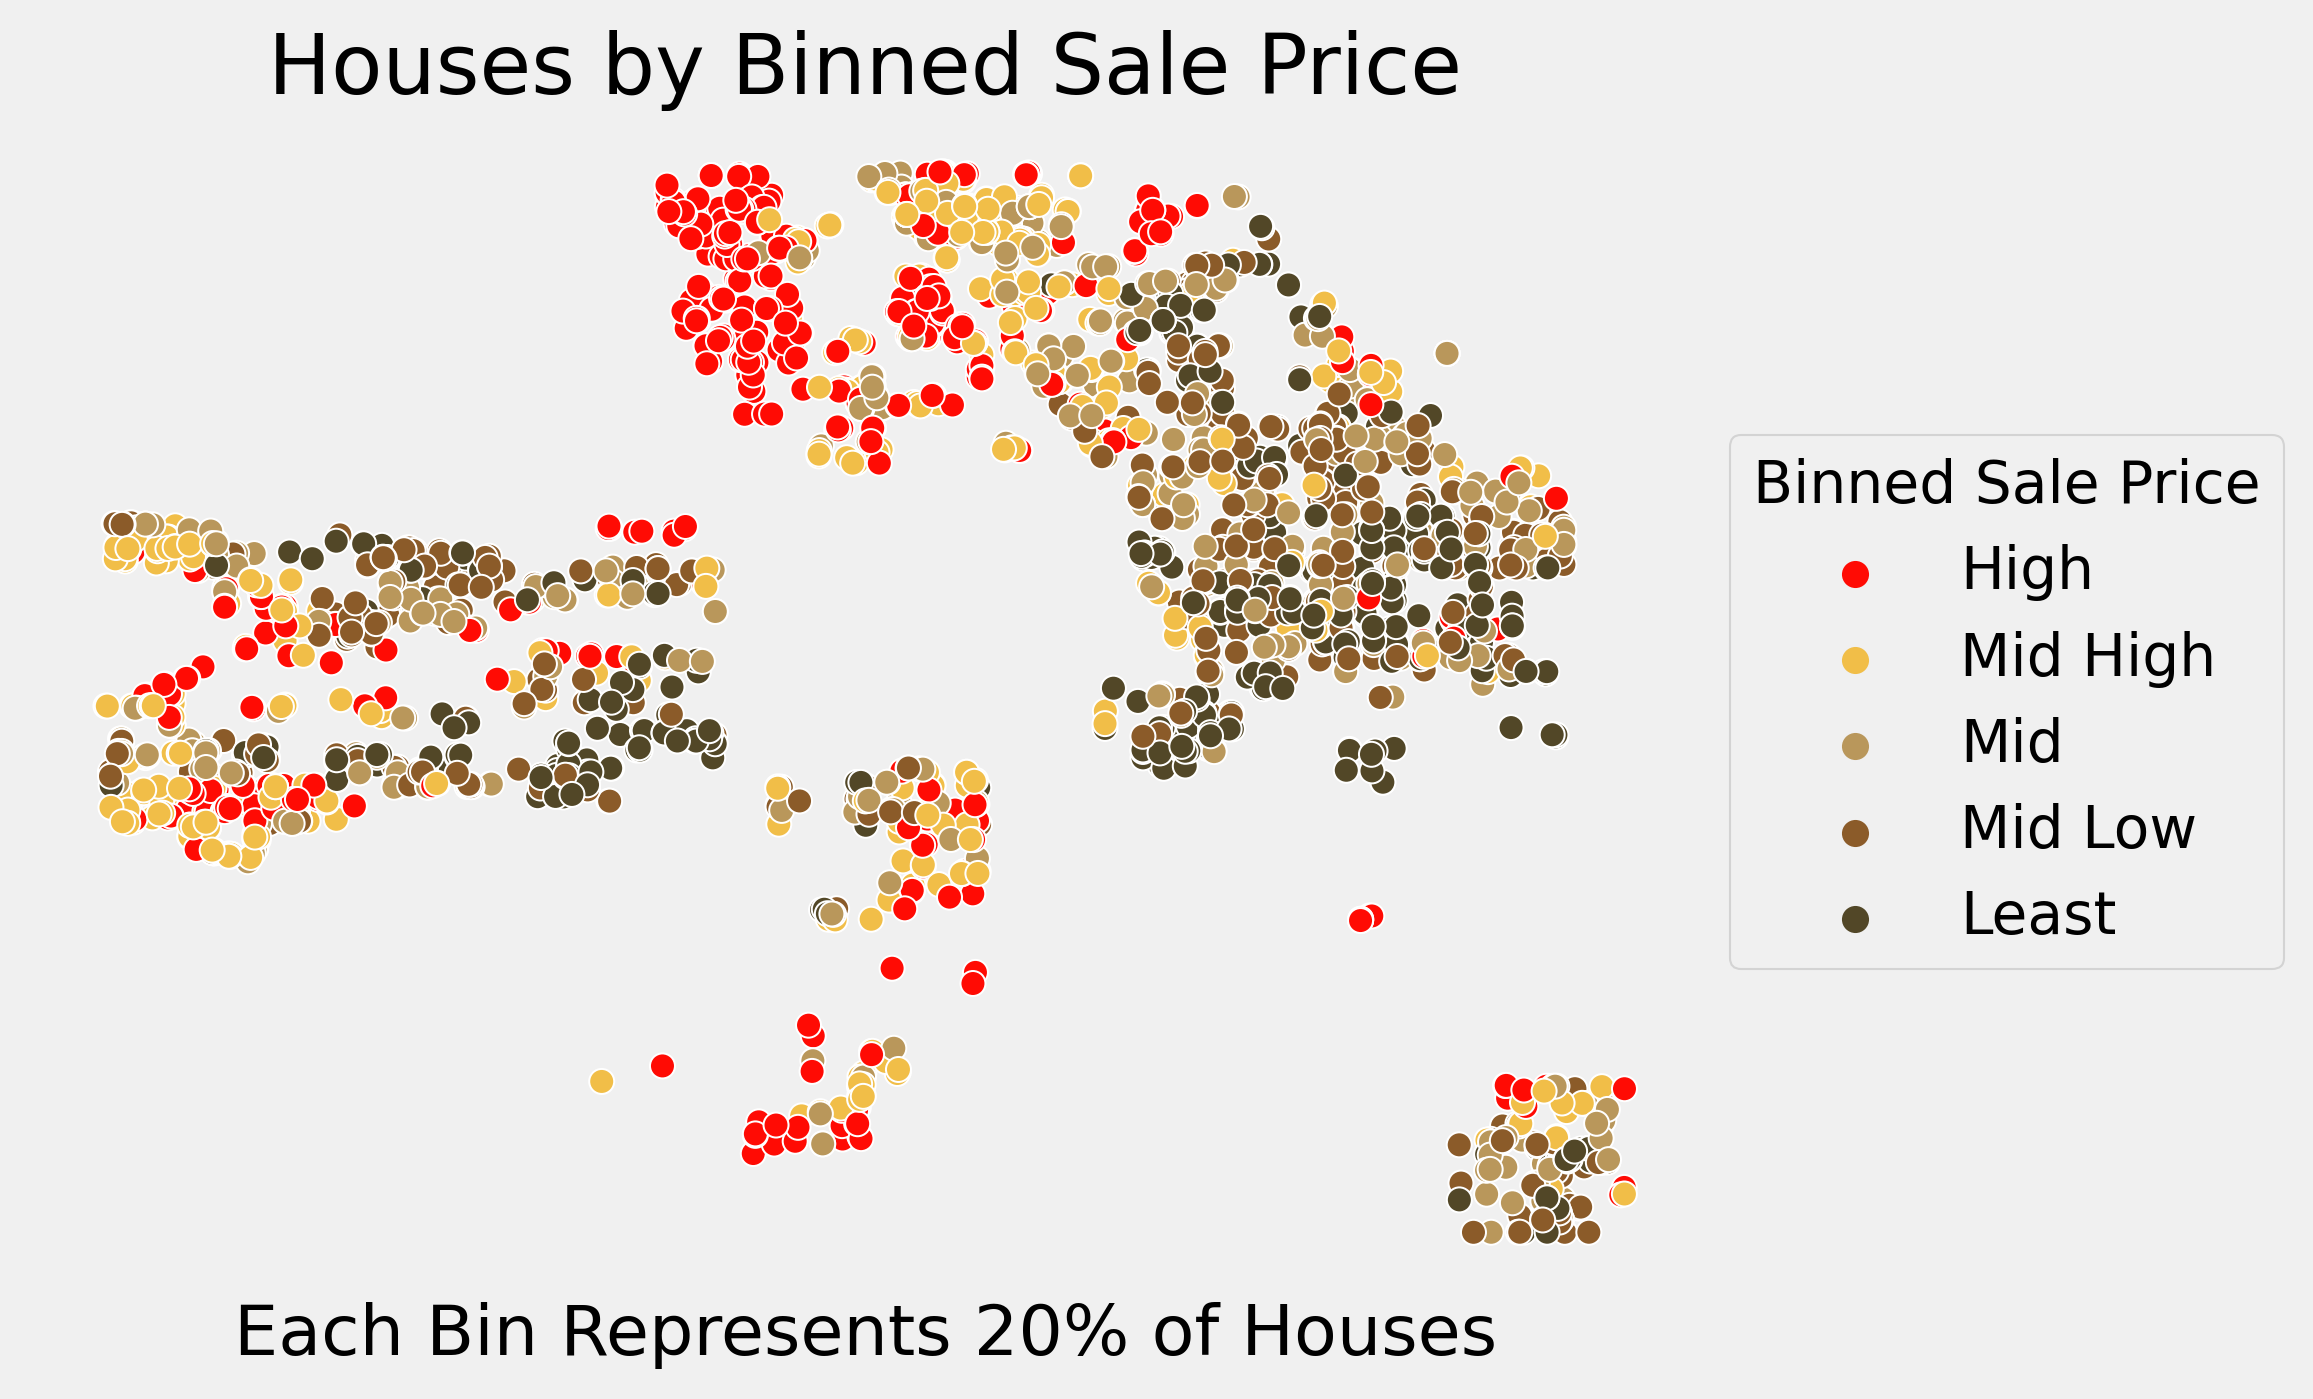

In [5]:
graph_df = loca
graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
                              q=5)
graph_df.SalePrice_bins = graph_df.SalePrice_bins.astype(str)

hue_order = ['(225000.0, 755000.0]', 
             '(177000.0, 225000.0]',
             '(146240.0, 177000.0]',
             '(125000.0, 146240.0]', 
             '(12788.999, 125000.0]']
g = sns.scatterplot(data = graph_df, y = 'latitude',x = 'longitude',
                    hue='SalePrice_bins',hue_order = hue_order,
                    palette = colors)
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Each Bin Represents 20% of Houses', ylabel='',title='Houses by Binned Sale Price')
g.grid(False)



handles, labels_ = g.get_legend_handles_labels()
labels=['High',
        'Mid High',
        'Mid',
        'Mid Low',
        'Least']
sns.move_legend(g,loc = "center left",bbox_to_anchor=(1, .5),
                labels=labels, handles = handles, title = 'Binned Sale Price',
               )

plt.show()

<ipython-input-6-b09142f33e8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['GrLivArea_bins'] = pd.qcut(graph_df['GrLivArea'],
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc

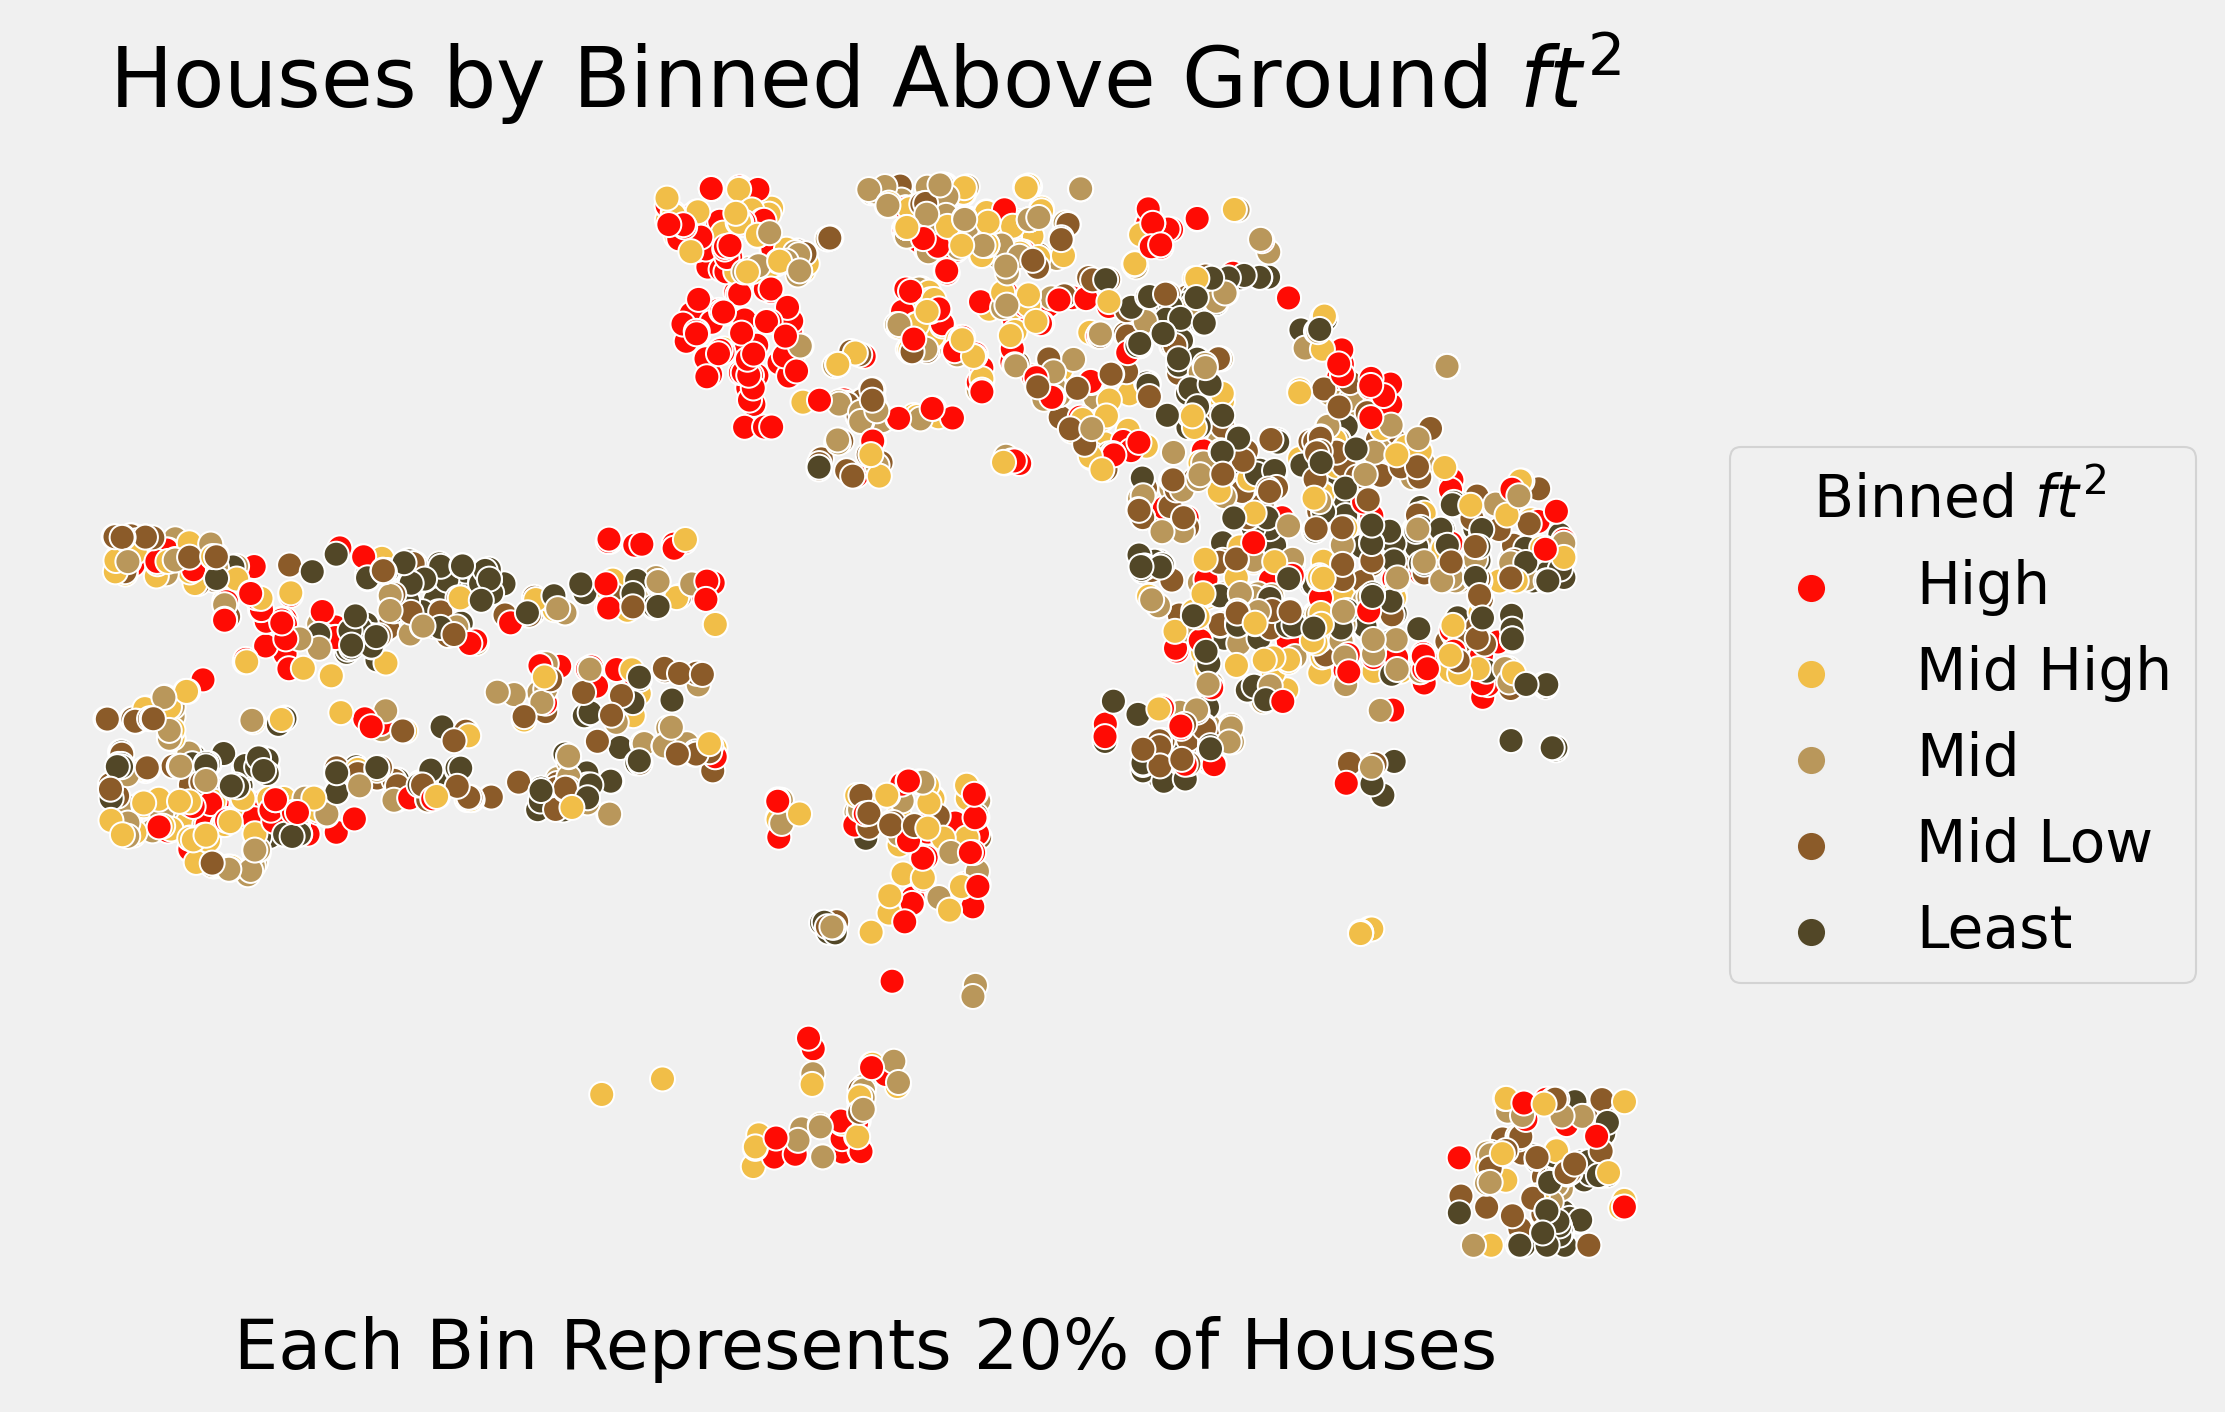

In [6]:
graph_df = loca
graph_df['GrLivArea_bins'] = pd.qcut(graph_df['GrLivArea'],
                              q=5)
graph_df.GrLivArea_bins = graph_df.GrLivArea_bins.astype(str)

hue_order = ['(1829.0, 4676.0]',
            '(1558.0, 1829.0]',
            '(1319.8, 1558.0]',
            '(1052.0, 1319.8]',
            '(333.999, 1052.0]']


g = sns.scatterplot(data = graph_df, y = 'latitude',x = 'longitude',
                    hue='GrLivArea_bins',
                    hue_order = hue_order,
                    palette = colors)
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Each Bin Represents 20% of Houses', ylabel='',title=r'Houses by Binned Above Ground $ft^{2}$')
g.grid(False)



handles, labels = g.get_legend_handles_labels()
labels=['High',
        'Mid High',
        'Mid',
        'Mid Low',
        'Least']
sns.move_legend(g,loc = "center left",bbox_to_anchor=(1, .5),
                labels=labels, handles = handles, 
                title = r'Binned $ft^{2}$ ',
               )


plt.show()

## neighborhood graphs

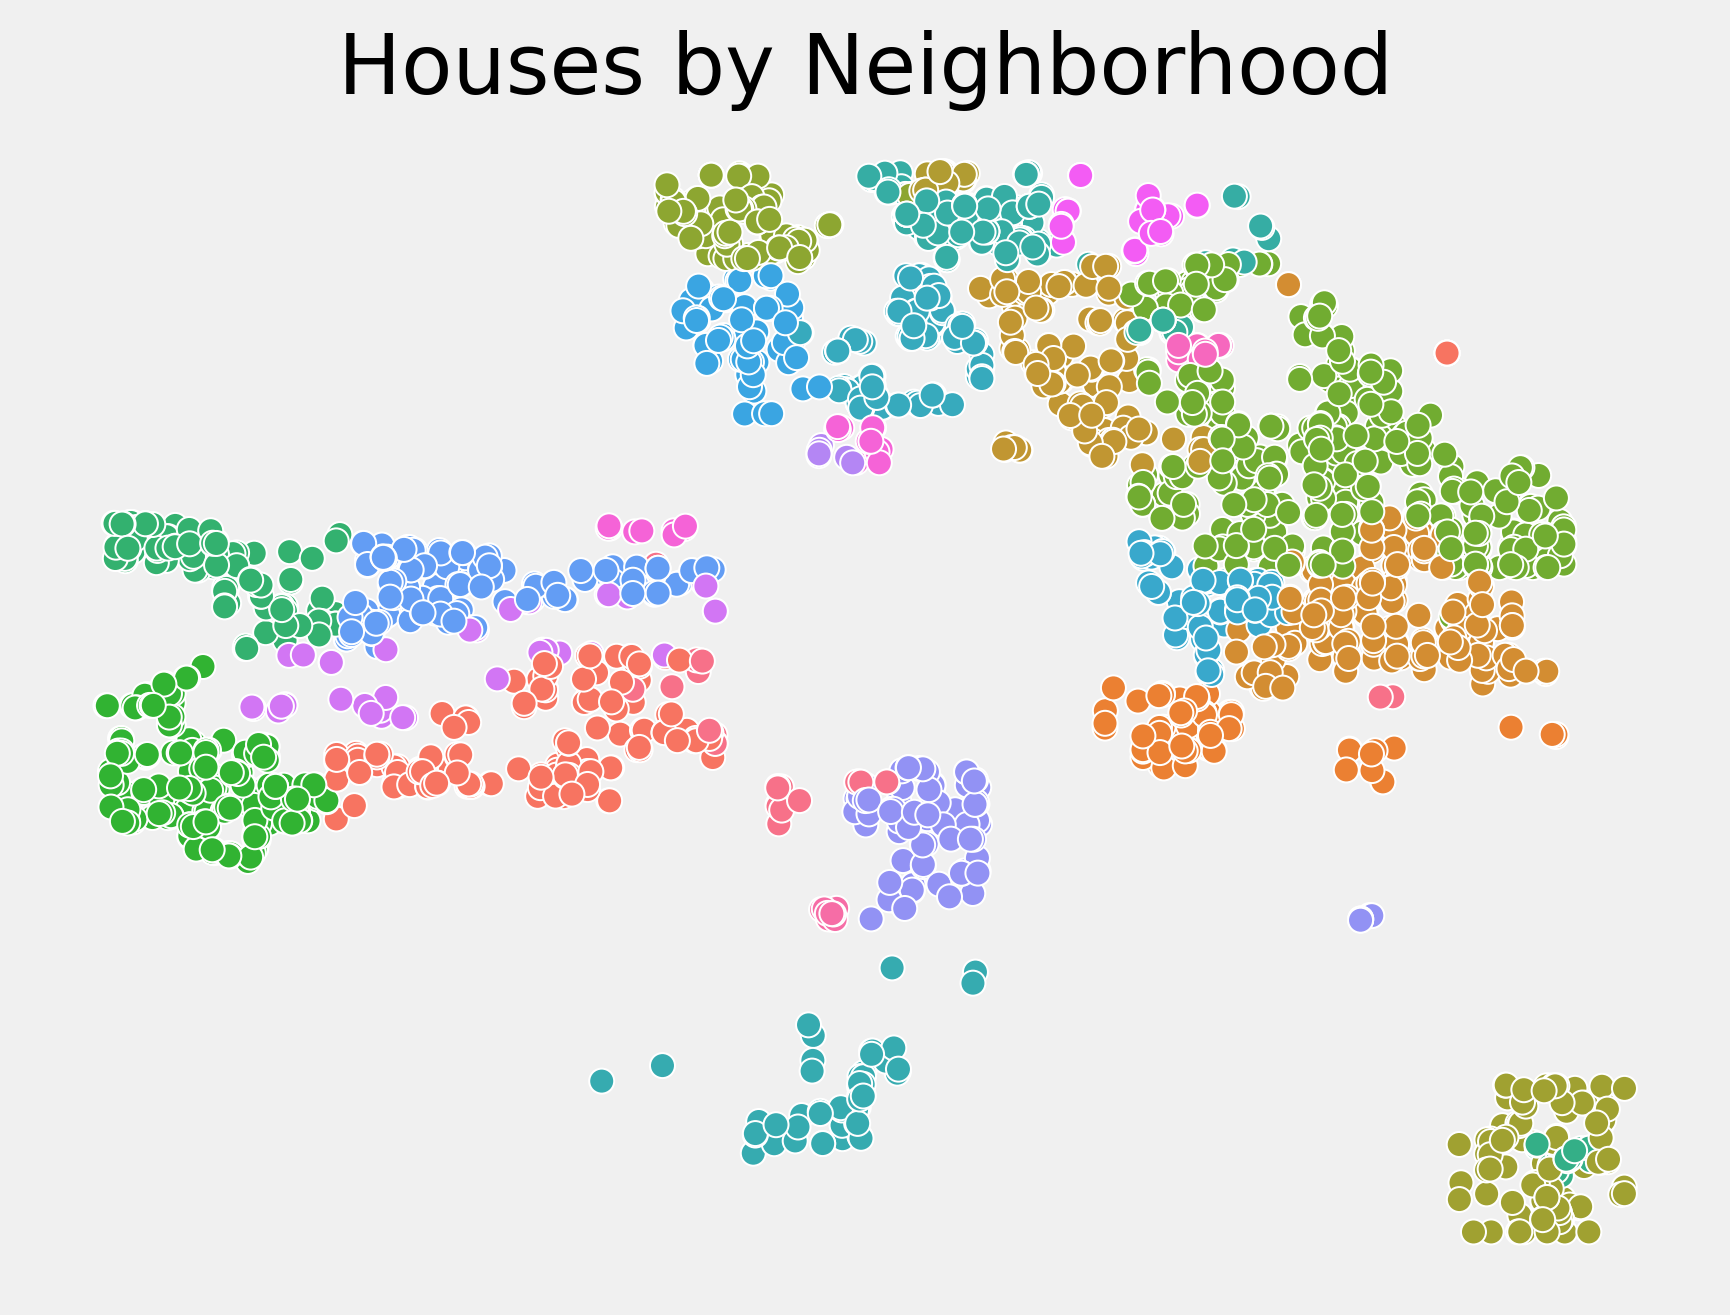

In [7]:
g = sns.scatterplot(data = loca, y = 'latitude',x = 'longitude',hue='Neighborhood',
                   legend=False)
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='', ylabel='',title='Houses by Neighborhood')
g.grid(False)

plt.show()

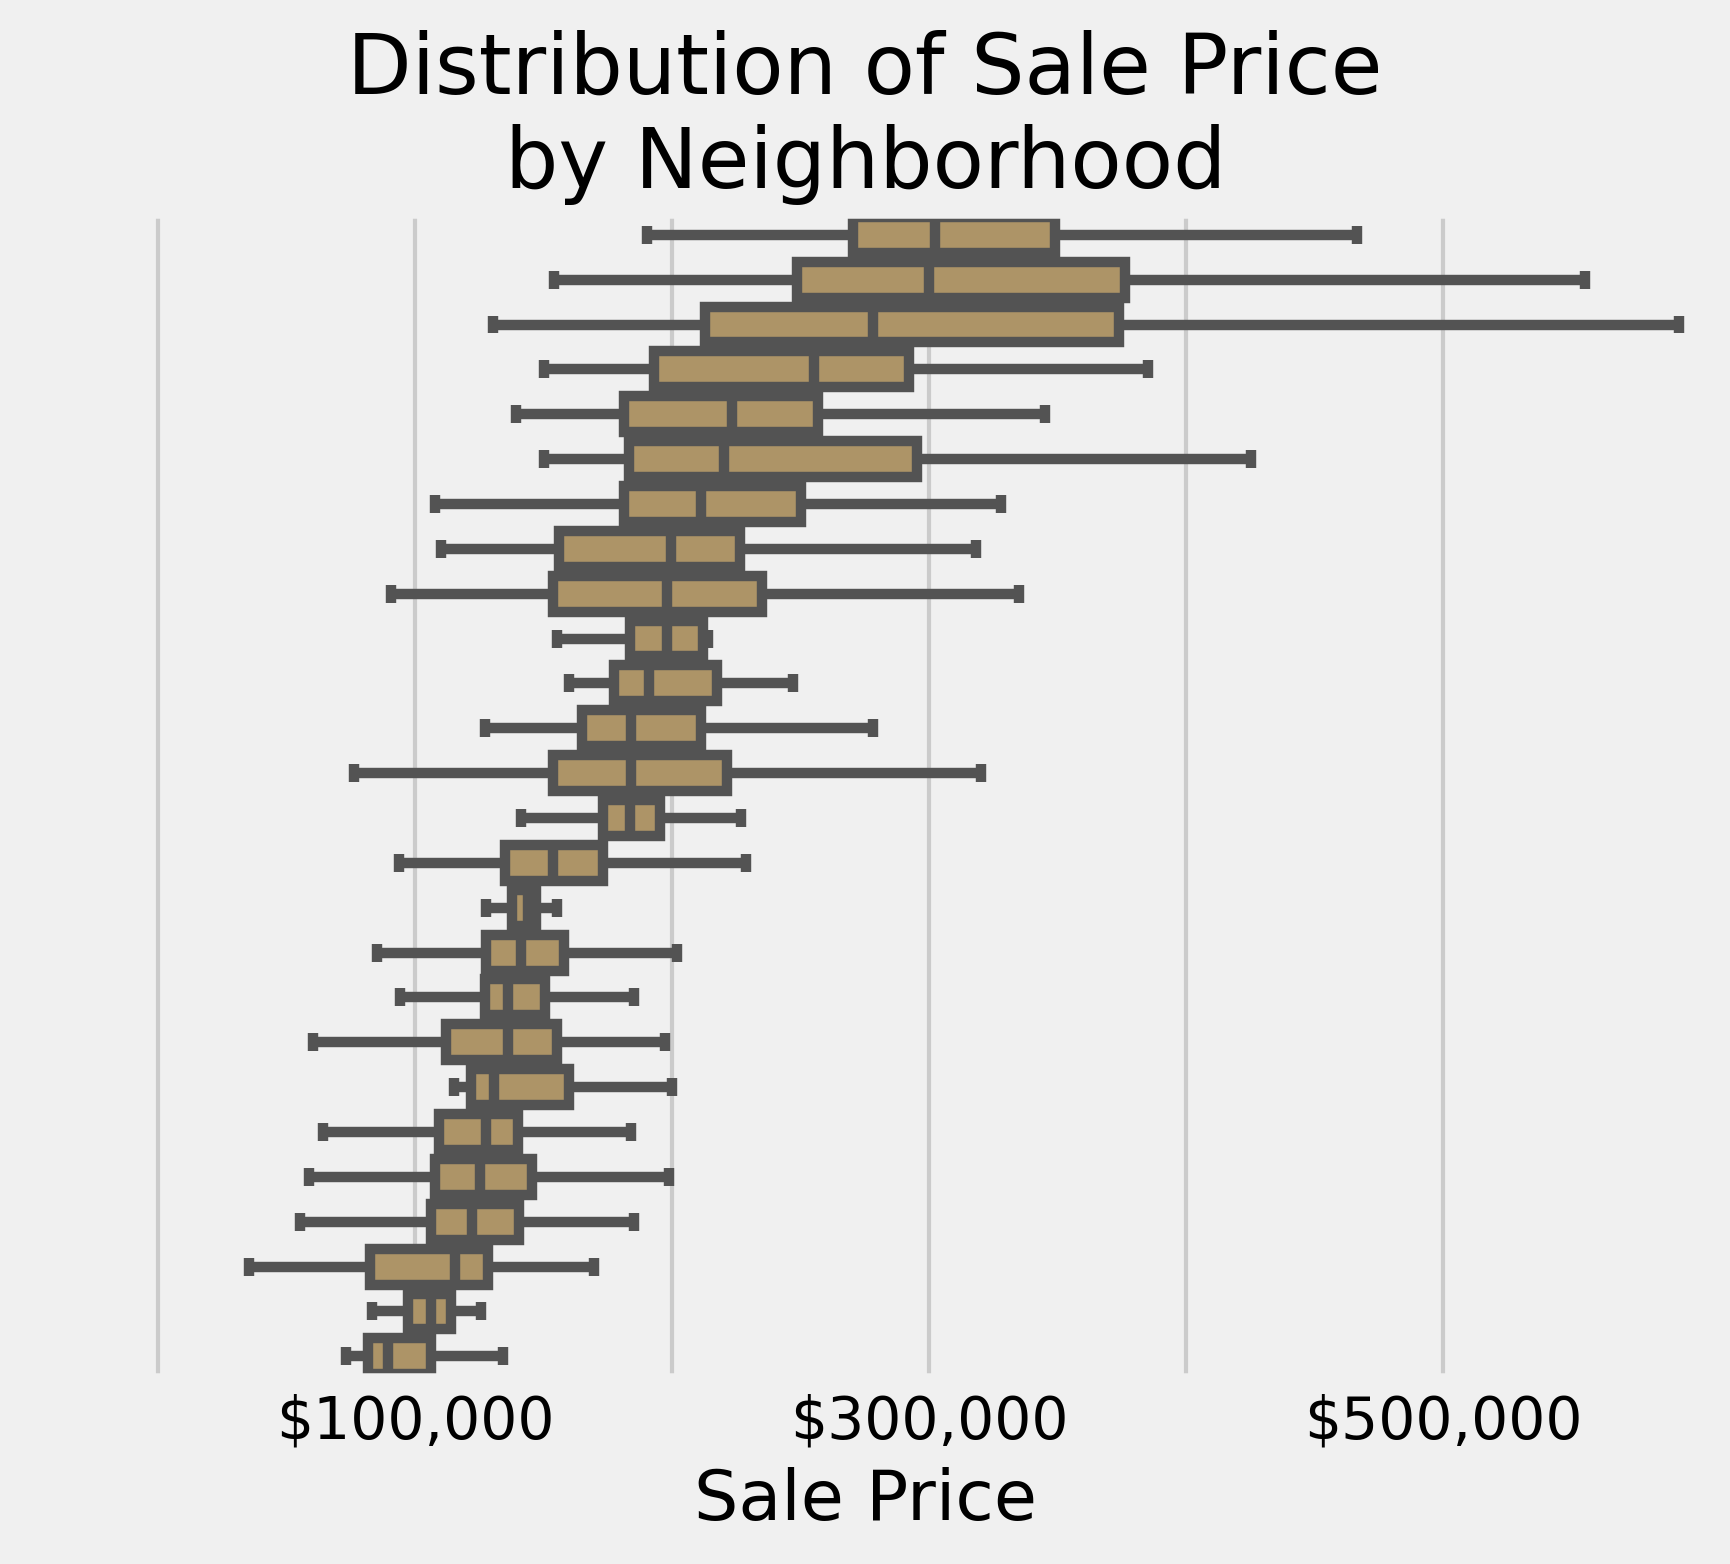

In [8]:
ordering = loca.groupby('Neighborhood').agg({'SalePrice':'median'}).sort_values('SalePrice',ascending=False).index

fig, ax = plt.subplots()
g = sns.boxplot(data=loca,x='SalePrice',y='Neighborhood',
                order = ordering,
                ax=ax,
                color = colors[2],
                linewidth=2.5,
                showfliers=False
               )
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Sale Price', ylabel='',title='Distribution of Sale Price\nby Neighborhood')

g.set(xlim=(-50000,600000))


g.set(xticks=[0,100000,200000,300000,400000,500000])
g.set_xticklabels(labels = ['','$100,000','','$300,000','','$500,000'])
plt.show()


## cluster graphs

In [10]:
nbhd_cluster_map = {'Blmngtn': 0,
                     'Blueste': 1,
                     'BrDale': 1,
                     'BrkSide': 1,
                     'ClearCr': 0,
                     'CollgCr': 0,
                     'Crawfor': 0,
                     'Edwards': 1,
                     'Gilbert': 0,
                     'Greens': 1,
                     'GrnHill': 0,
                     'IDOTRR': 1,
                     'Landmrk': 1,
                     'MeadowV': 1,
                     'Mitchel': 1,
                     'NAmes': 1,
                     'NPkVill': 1,
                     'NWAmes': 0,
                     'NoRidge': 0,
                     'NridgHt': 0,
                     'OldTown': 1,
                     'SWISU': 1,
                     'Sawyer': 1,
                     'SawyerW': 0,
                     'Somerst': 0,
                     'StoneBr': 0,
                     'Timber': 0,
                     'Veenker': 0}

In [11]:
import matplotlib.patches as mpatches

<ipython-input-12-44d034f6755e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loca['NhdCluster'] = loca.apply(lambda x: nbhd_cluster_map[x['Neighborhood']], axis=1)


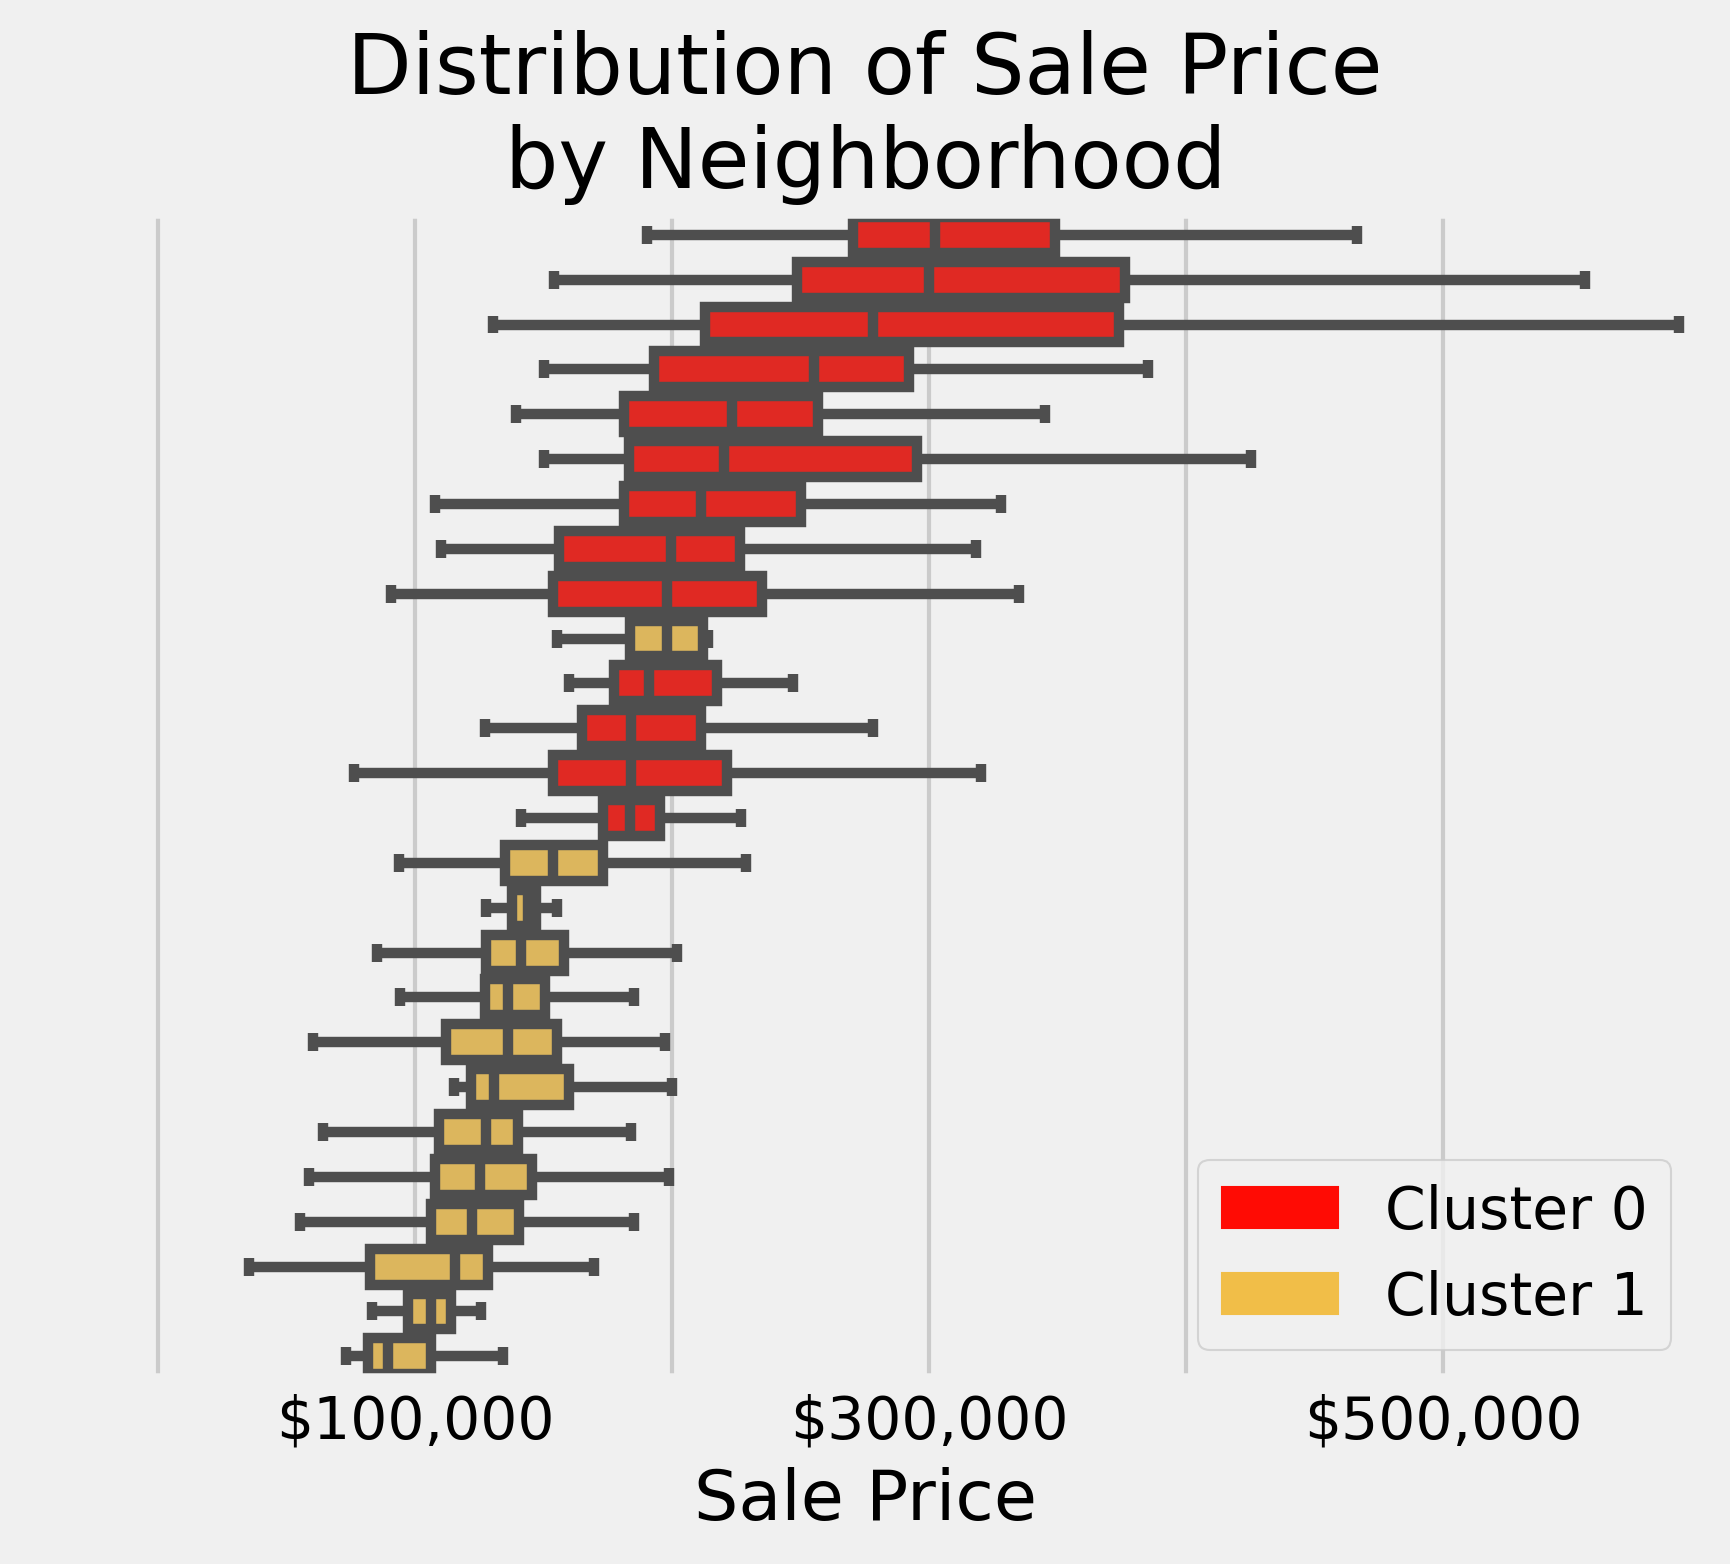

In [12]:
loca['NhdCluster'] = loca.apply(lambda x: nbhd_cluster_map[x['Neighborhood']], axis=1)


ordering = loca.groupby('Neighborhood').agg({'SalePrice':'median'}).sort_values('SalePrice',ascending=False).index
color_map = {0:colors[0],1:colors[1]}

box_colors = list(map(color_map.get,list(map(nbhd_cluster_map.get, list(ordering)))))

fig, ax = plt.subplots()
g = sns.boxplot(data=loca,x='SalePrice',y='Neighborhood', 
                order = ordering,
                ax=ax,
                palette = box_colors,
                linewidth=2.5,
                showfliers=False,
               )

plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Sale Price', ylabel='',title='Distribution of Sale Price\nby Neighborhood')


g.set(xlim=(-50000,600000))

g.set(xticks=[0,100000,200000,300000,400000,500000])
g.set_xticklabels(labels = ['','$100,000','','$300,000','','$500,000'])

pos_patch = mpatches.Patch(color=colors[0], label='Cluster 0')
neg_patch = mpatches.Patch(color=colors[1], label='Cluster 1')
plt.legend(handles=[pos_patch,neg_patch])

plt.show()

In [13]:
color_map = {0:colors[0],1:colors[1]}

box_colors = list(map(color_map.get,list(map(nbhd_cluster_map.get, list(ordering)))))


<ipython-input-14-424b2d80d21e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


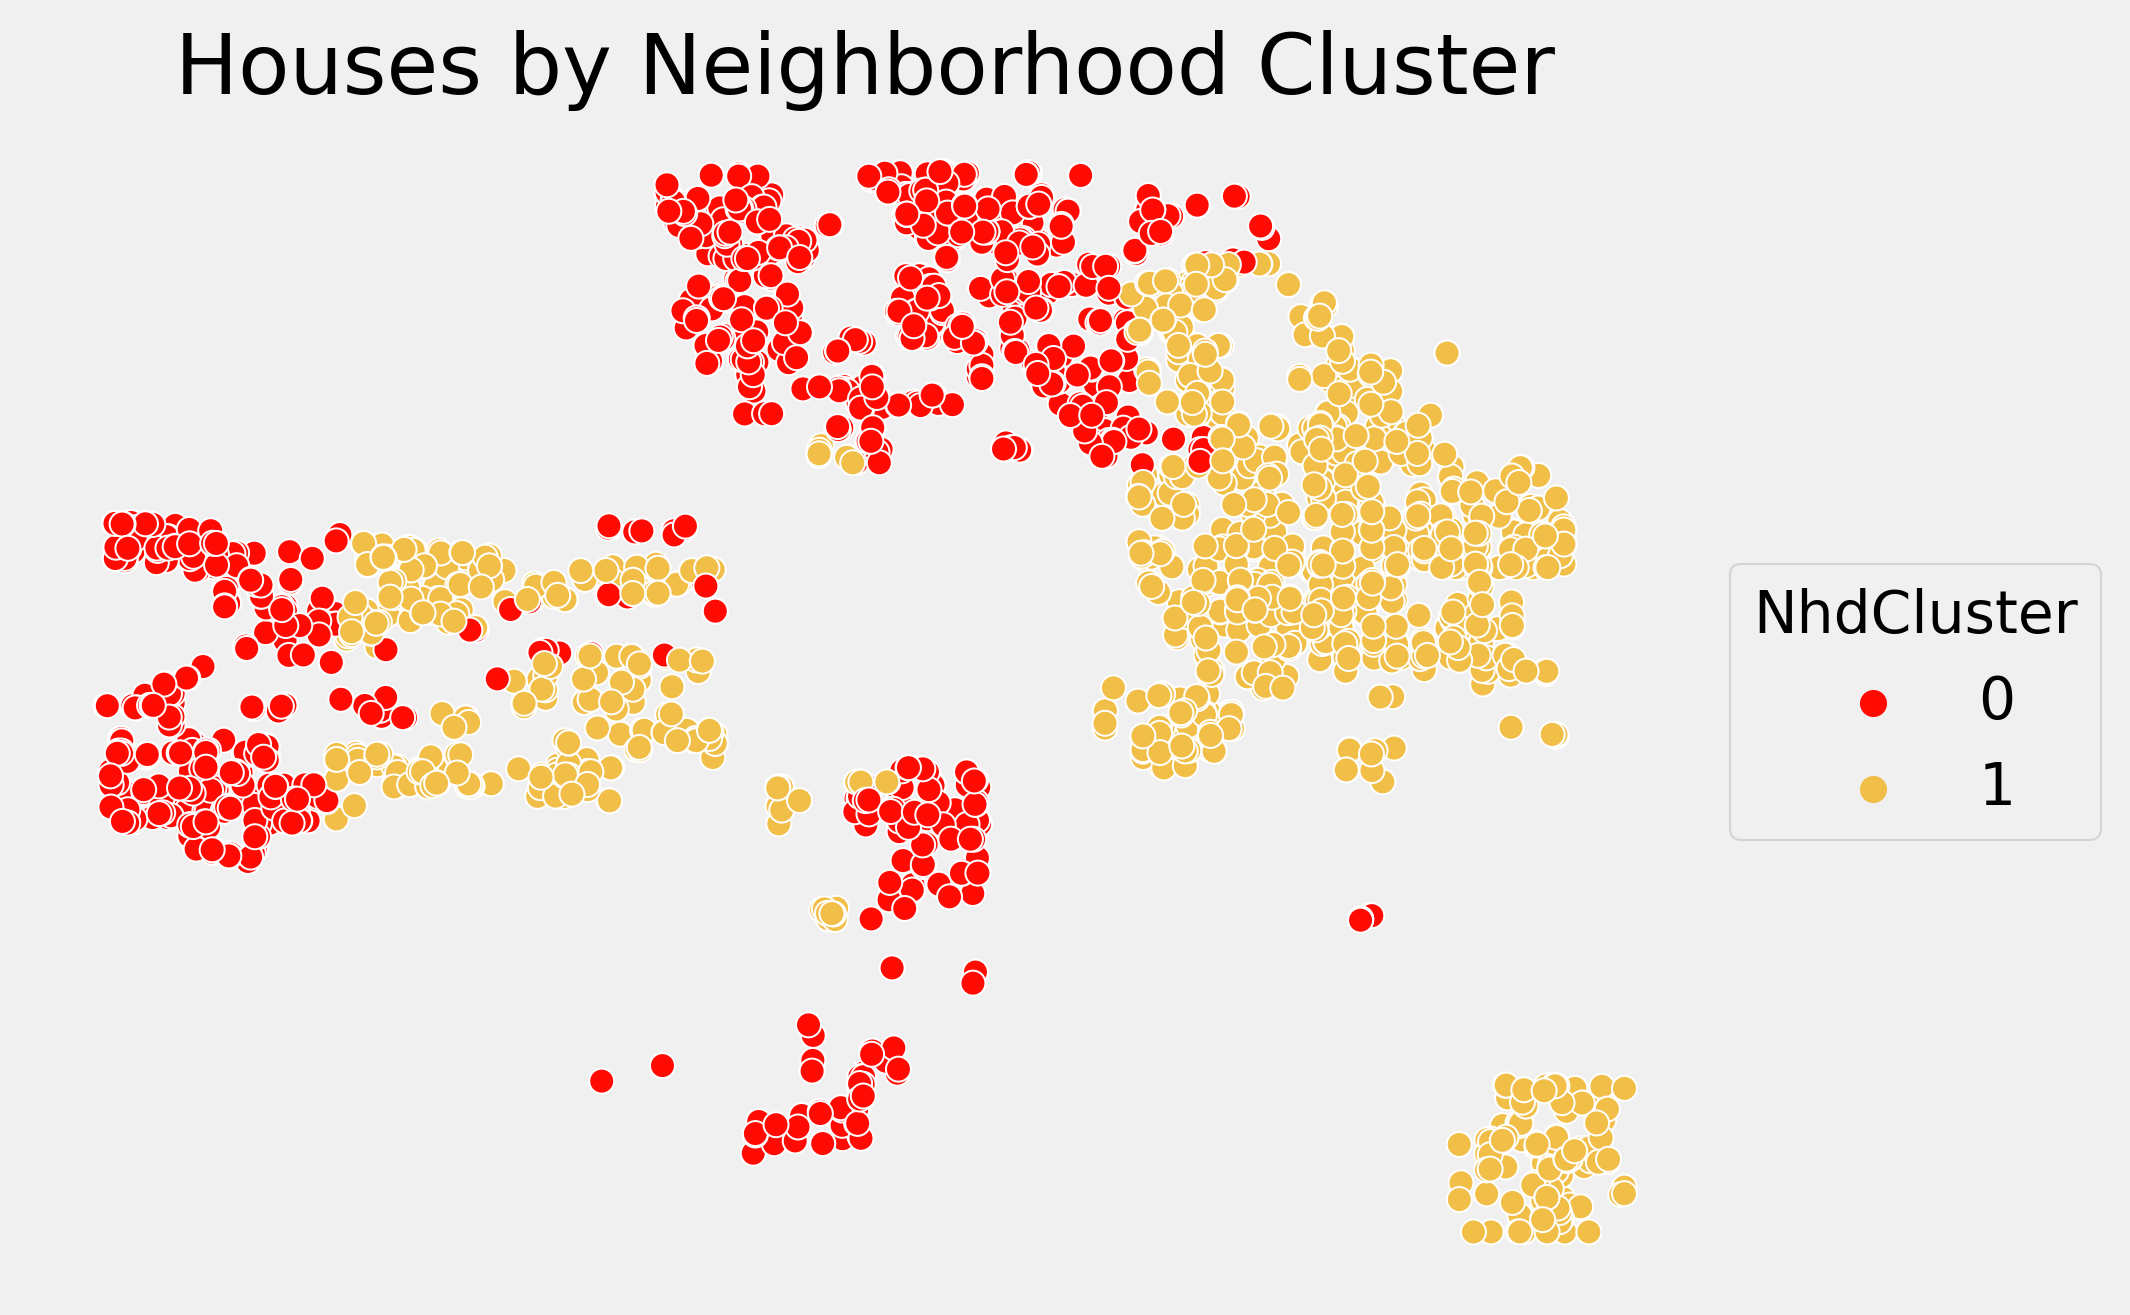

In [14]:
graph_df = loca
graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
                              q=5)
graph_df.SalePrice_bins = graph_df.SalePrice_bins.astype(str)

g = sns.scatterplot(data = graph_df, y = 'latitude',x = 'longitude',
                    hue='NhdCluster',
#                     palette = colors,
                   )
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='', ylabel='',title='Houses by Neighborhood Cluster')
g.grid(False)

sns.move_legend(g,loc = "center left",bbox_to_anchor=(1, .5),
#                 labels=labels, handles = handles, title = 'Binned Sale Price',
#                 frameon=False
               )

plt.show()